In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import batman
import emcee
from astropy.time import Time
import h5py
import corner
from matplotlib.ticker import ScalarFormatter

In [2]:
eclipses = ['1', '2', '3']
a = '5'
#aperture = ['4', '7', '12']
segments = ['0000', '0001', '0002', '0003', '0004']

# Initialize dictionaries to hold arrays for each aperture
time_arr = {e: [] for e in eclipses}
aplev_arr = {e: [] for e in eclipses}
aperr_arr = {e: [] for e in eclipses}
centroid_x_arr = {e: [] for e in eclipses}
centroid_y_arr = {e: [] for e in eclipses}


for e in eclipses:
    for seg in segments:
        if e == '1':
            path = '/Volumes/HardDrive/LHS1140-c/JWST_eclipse'+ e +'/LHS1140c-S3_ap' + a + '_bg12_30/S3_lhs1140c_ap' + a + '_bg12_30_FluxData_seg'+seg+'.h5'
        elif e == '2':
            path = '/Volumes/HardDrive/LHS1140-c/JWST_eclipse'+ e +'/Stage3/S3_2024-07-22_lhs1140c_run1/ap' + a + '_bg12_30/S3_lhs1140c_ap' + a + '_bg12_30_FluxData_seg'+seg+'.h5'
        elif e == '3':
            path = '/Volumes/HardDrive/LHS1140-c/JWST_eclipse'+ e +'/Stage3/S3_2024-08-05_lhs1140c_run1/ap' + a + '_bg12_30/S3_lhs1140c_ap' + a + '_bg12_30_FluxData_seg'+seg+'.h5'
        with h5py.File(path, 'r') as file:     # open the file
            time_arr[e] = np.append(time_arr[e], np.array(file['time']))
            aplev_arr[e] = np.append(aplev_arr[e], np.array(file['aplev']))
            aperr_arr[e] = np.append(aperr_arr[e], np.array(file['aperr']))
            centroid_x_arr[e] = np.append(centroid_x_arr[e], np.array(file['centroid_x']))
            centroid_y_arr[e] = np.append(centroid_y_arr[e], np.array(file['centroid_y']))

    time_arr[e] = np.array(time_arr[e])
    aplev_arr[e] = np.array(aplev_arr[e])
    aperr_arr[e] = np.array(aperr_arr[e])
    centroid_x_arr[e] = np.array(centroid_x_arr[e])
    centroid_y_arr[e] = np.array(centroid_y_arr[e])

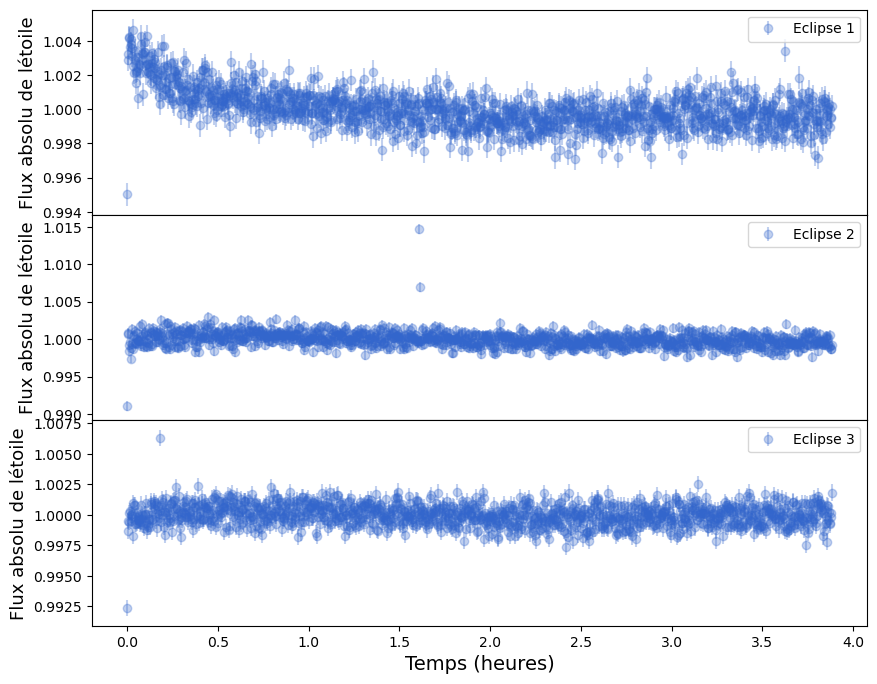

In [3]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
aperr_norm = {}
aplev_norm = {}
for i, e in enumerate(eclipses):
    aperr_norm[e] = aperr_arr[e]/np.mean(aplev_arr[e])
    aplev_norm[e] = aplev_arr[e]/np.mean(aplev_arr[e])
    ax[i].errorbar((time_arr[e]-time_arr[e][0])*24, aplev_norm[e], yerr=aperr_norm[e], fmt='o', label='Eclipse '+e, alpha=0.3, color='#3366cc')
    ax[i].set_ylabel('Flux absolu de l''étoile', fontsize=13)
    # make labelfont size bigger
    ax[i].legend()
ax[0].tick_params(labelbottom=False)
ax[1].tick_params(labelbottom=False)
ax[2].set_xlabel('Temps (heures)', fontsize=14)
plt.subplots_adjust(hspace=0)
#plt.tight_layout()
plt.show()

1260 1260 1260 3780 3780
0.09827457404753659
2.358589777140878 47.69218977706623


Text(0.5, 0, 'Time (days)')

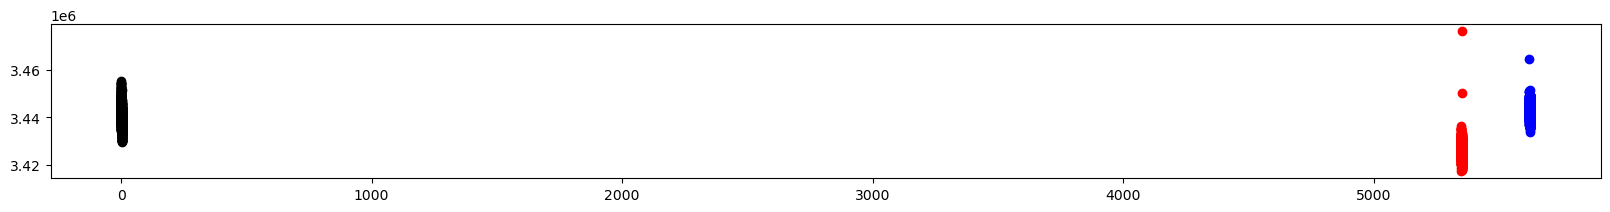

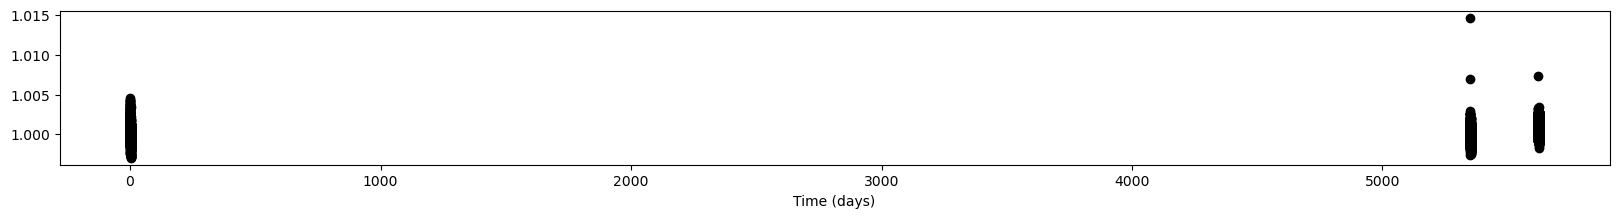

In [4]:
ndiscard = 2
len1 = len(time_arr['1'])-ndiscard
len2 = len(time_arr['2'])-ndiscard
len3 = len(time_arr['3'])-ndiscard
# starting points
# e1 = 0
# e2 = len1
# e3 = len1 + len2
time = np.concatenate((time_arr['1'][ndiscard:], time_arr['2'][ndiscard:], time_arr['3'][ndiscard:]))
aplev = np.concatenate((aplev_arr['1'][ndiscard:]/np.mean(aplev_arr['1'][ndiscard:]), aplev_arr['2'][ndiscard:]/np.mean(aplev_arr['2'][ndiscard:]), aplev_arr['3'][ndiscard:]/np.mean(aplev_arr['1'][ndiscard:])))
aperr = np.concatenate((aperr_norm['1'][ndiscard:], aperr_norm['2'][ndiscard:], aperr_norm['3'][ndiscard:]))
#aplev = aplev / np.mean(aplev)
centroid_x = np.concatenate((centroid_x_arr['1'][ndiscard:], centroid_x_arr['2'][ndiscard:], centroid_x_arr['3'][ndiscard:]))
centroid_y = np.concatenate((centroid_y_arr['1'][ndiscard:], centroid_y_arr['2'][ndiscard:], centroid_y_arr['3'][ndiscard:]))

print(len1, len2, len3, (len1+len2+len3), len(time))

p0_e1 = [0.00344908196627231, 2.1384616526923503, 0.9996595799196581]
p0_e2 = [0.9442588023676416, 0.00023172786914537203, 0.056190963345282764] #len1]
p0_e3 = [0.284437766861067, 0.0003218453369957566, 0.7158164845760568] # len1+len2]

ecl = Time('2023-11-27 21:00', format = 'iso', scale = 'tdb')
ecl = ecl.mjd
print(ecl-time[0])
t_s = (60275.875-time[0])*(24)
ecl = t_s
t0 = (58388.7939-time[0])*(24)
per = 3.777940*24
t0 = t0+(per*500)
print(t_s, t0)
fp = 0.000230
p0_astro = np.array([t_s, fp]) 
time = (time - time[0])*(24)

plt.figure(figsize=(20, 2))
plt.plot(time[0:len1], aplev_arr['1'][ndiscard:], 'ok')
plt.plot(time[len1:(len1+len2)], aplev_arr['2'][ndiscard:], 'or')
plt.plot(time[(len1+len2):], aplev_arr['3'][ndiscard:], 'ob')
plt.figure(figsize=(20, 2))
plt.plot(time, aplev, 'ok')
plt.xlabel('Time (days)')

[5621.57837417 5621.5814529  5621.58453162 ... 5625.44832922 5625.45140794
 5625.45448666] [1.00047317 1.00036443 1.00111927 ... 1.00076869 1.00113168 1.00277481]


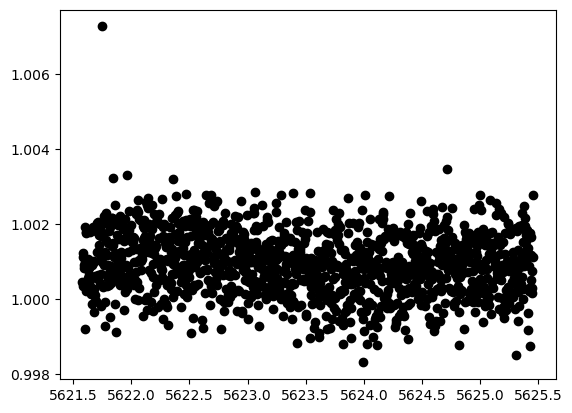

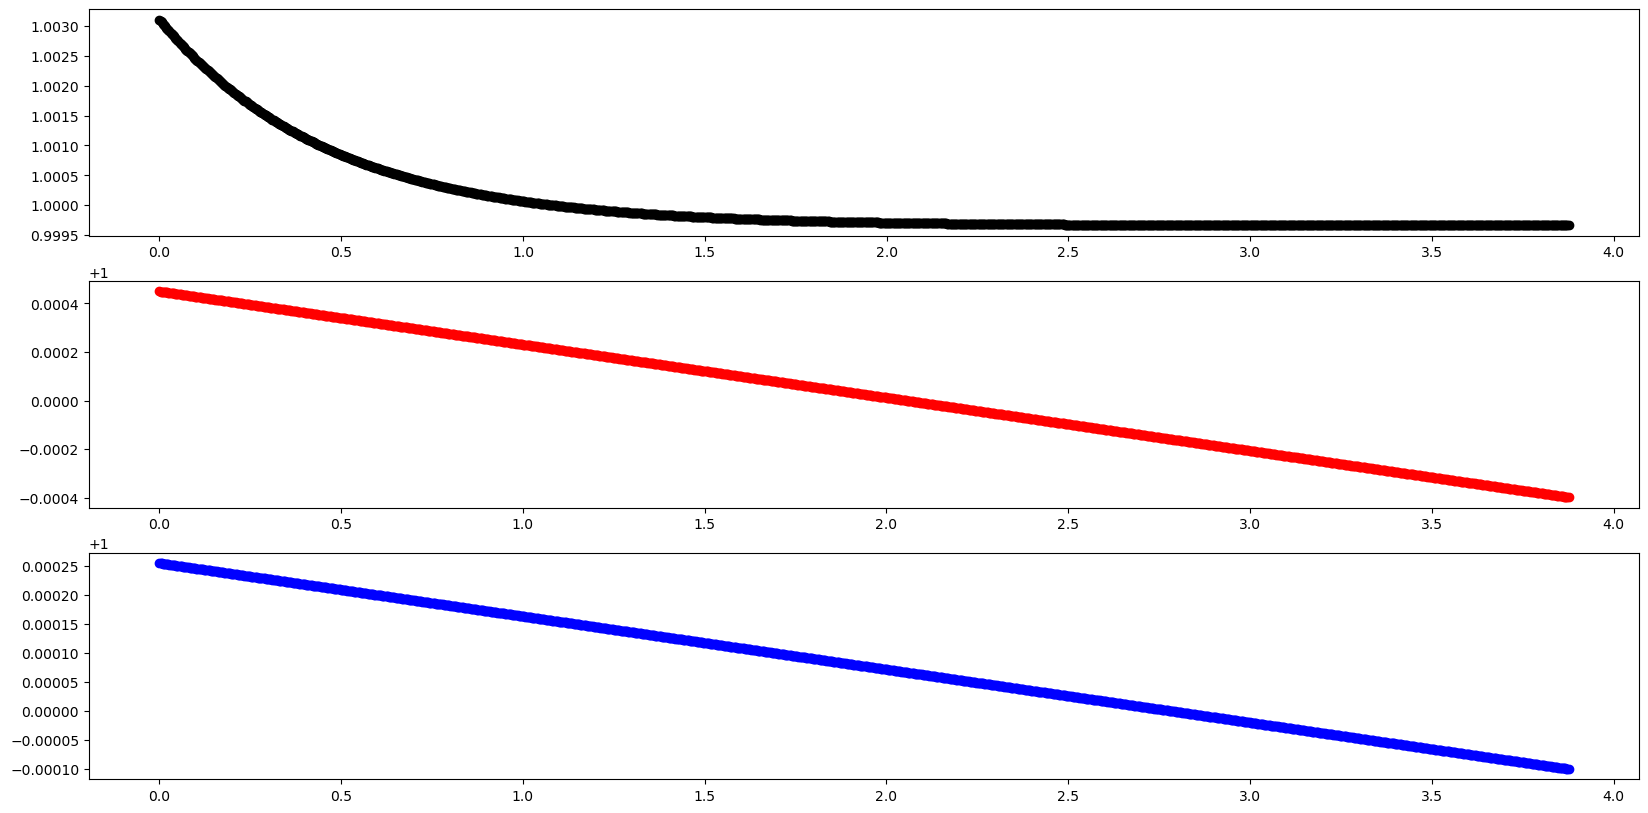

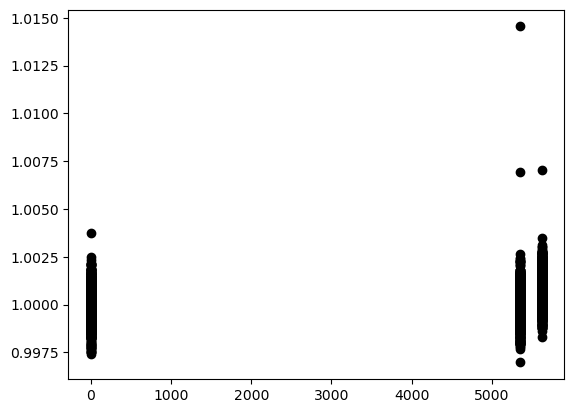

In [8]:
# Split the time array
time_segment_1 = time[:len1]
time_segment_2 = time[len1:len1+len2]
time_segment_3 = time[len1+len2:]
aplev_segment_1 = aplev[:len1]
aplev_segment_2 = aplev[len1:len1+len2]
aplev_segment_3 = aplev[len1+len2:]
print(time_segment_3, aplev_segment_3)
plt.plot(time_segment_3, aplev_segment_3, 'ok')

# Apply functions to each segment
fig, ax = plt.subplots(3, 1, figsize=(20, 10))
result1 = exponential_func(time_segment_1-time_segment_1[0], 0.00344908196627231, 2.1384616526923503, 0.9996595799196581)
ax[0].plot(time_segment_1, result1, 'ok')

result2 = exponential_func(time_segment_2-time_segment_2[0], 0.9442588023676416, 0.00023172786914537203, 0.056190963345282764)
#ax[1].plot(time_segment_2, aplev_segment_2, 'ob')
ax[1].plot(time_segment_2-time_segment_2[0], result2, 'or')

result3 = exponential_func(time_segment_3-time_segment_3[0], 0.284437766861067, 0.0003218453369957566, 0.7158164845760568)
#ax[2].plot(time_segment_3-time_segment_3[0], result3, 'ob')
ax[2].plot(time_segment_3 - time_segment_3[0], result3, 'ob')  # Corrected

#ax[2].plot(time_segment_3, aplev_segment_3, 'ob')

# Combine results back into one array
plt.figure()
final_result = np.concatenate([result1, result2, result3])
plt.plot(time, aplev/final_result, 'ok')


(0.999, 1.001)

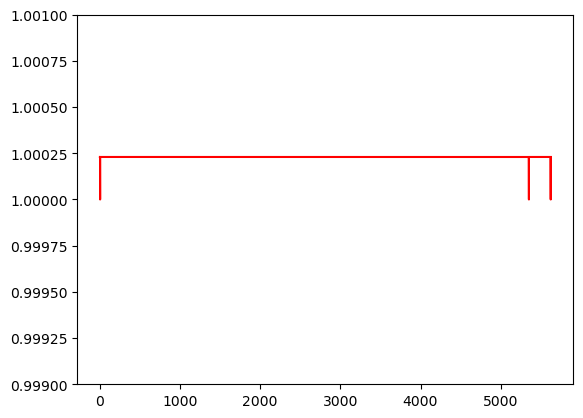

In [9]:
flux = transit_model(time, t_s, fp)

plt.plot(time, flux, '-r')
plt.ylim(0.999, 1.001)
#plt.xlim(-1, 5)
#plt.xlim(5340, 5360)
#plt.xlim(5620, 5630)

In [41]:
# set p0 as previous MCMC results
#p0 = np.concatenate((p0_astro, p0_e1, p0_e2, p0_e3, [0.001]))
p0_astro = [2.2840699031857015, 0.0002821004349741118]
p0_e1 = [0.0034301126300667444, 2.0285166194834243, 0.9993698964979745]
p0_e2 = [2.49278375864204, 9.002631737167447e-05, -1.4925466969049936]
p0_e3 = [0.4308205316985768, 0.00018639928629155244, 0.5700895686883548]


In [42]:
p0 = np.concatenate((p0_astro, p0_e1, p0_e2, p0_e3, [0.001]))
nsteps, nwalkers, ndim = 100000, 70, len(p0)

# lower the initial position scatter
pos = p0 + 1e-5 * np.random.randn(nwalkers, ndim)

#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=(time, aplev, centroid_x, centroid_y)) 
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=(time, aplev))

pos2, prob, state = sampler.run_mcmc(pos, nsteps, progress=True)

100%|██████████| 100000/100000 [43:58<00:00, 37.90it/s] 


In [43]:
nBurnInSteps2 = 1000
lnprobchain = sampler.get_log_prob(discard=nBurnInSteps2).swapaxes(0,1)
chain = sampler.get_chain(discard=nBurnInSteps2).swapaxes(0,1)

# Save the chains
savepath = 'Joint_results/try5_'
pathchain = savepath + 'samplerchain_10000.npy'
pathlnlchain = savepath + 'samplerlnlchain_10000.npy'
pathposit = savepath + 'samplerposi_10000.npy'
pathlnpro = savepath + 'samplerlnpr_10000.npy'
np.save(pathchain, chain)
np.save(pathlnlchain, lnprobchain)
np.save(pathposit, pos2)
np.save(pathlnpro, prob)

In [38]:
# load previous results
path = 'Joint_results/try4_'
savepath = 'Joint_results/try4_'
chain = np.load(path +'samplerchain_10000.npy')
lnprobchain = np.load(path  + 'samplerlnlchain_10000.npy')
pos2 = np.load(path + 'samplerlnlchain_10000.npy')
prob = np.load(path + 'samplerlnlchain_10000.npy')

In [45]:
samples = chain.reshape((-1, ndim))

MCMC_Results = np.array(list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84],axis=0)))))

maxk, maxiter = np.unravel_index((lnprobchain).argmax(), (lnprobchain).shape)
p0_mcmc = chain[maxk, maxiter,:]
for i in range(len(p0_mcmc)):
    MCMC_Results[i] = (p0_mcmc[i], MCMC_Results[i][1], MCMC_Results[i][2])

p0_labels = ['t_s','fp', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13', 'sigF']
p0_labels[ndim-1] ='sigF'

out = "MCMC result:\n\n"
for i in range(len(p0_mcmc)):
    out += '{:>8} = {:>16}  +{:>16}  -{:>16}\n'.format(p0_labels[i],MCMC_Results[i][0], MCMC_Results[i][1], MCMC_Results[i][2])
print(out, flush=True)
textfile = savepath + 'results.txt'
with open(textfile, 'w') as f:
    f.write(out)
p0_centroid = p0_mcmc

MCMC result:

     t_s = 2.278491804719999  +0.015230765251997624  -0.017931057650052207
      fp = 0.00028310173473029864  +3.4043677400227856e-05  -3.309985129597629e-05
     c_1 = 0.0034803130387732577  +0.0001487881780608785  -0.00014659430233124587
     c_2 = 2.103406626364464  +0.16108769713354576  -0.14997468365782196
     c_3 = 0.9993677913675459  +3.926822293687238e-05  -3.952496882819734e-05
     c_4 = 0.7795634830874817  +7.837148624365269  -2.02832231466282
     c_5 = 0.0002981152909706708  +0.00017877130719241366  -5.670136645354861e-05
     c_6 = 0.2206829717985339  +2.028390961406044  -7.837108974914839
     c_7 = 0.30000882710689547  +4.219913241740298  -0.4172104971359588
     c_8 = 0.0002715396719060638  +0.0018943526286577864  -0.00016952123590330327
     c_9 = 0.700896991967062  +0.41720297353540525  -4.219910503060356
    sigF = 0.0008568028901300273  +9.672135212982478e-06  -9.713211902640136e-06



(0.998, 1.002)

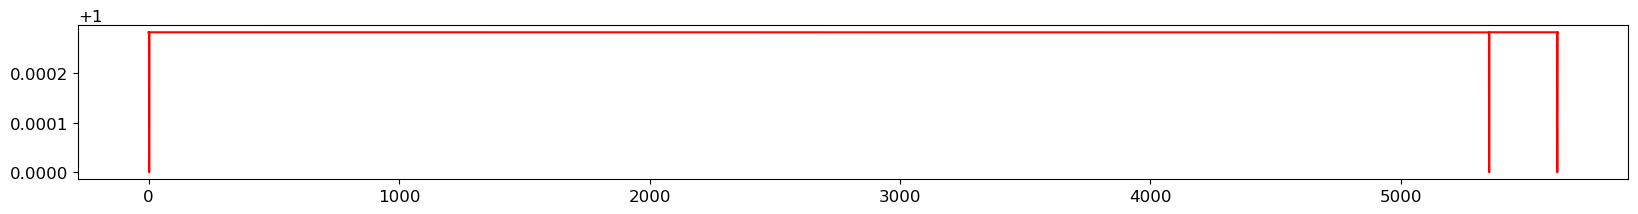

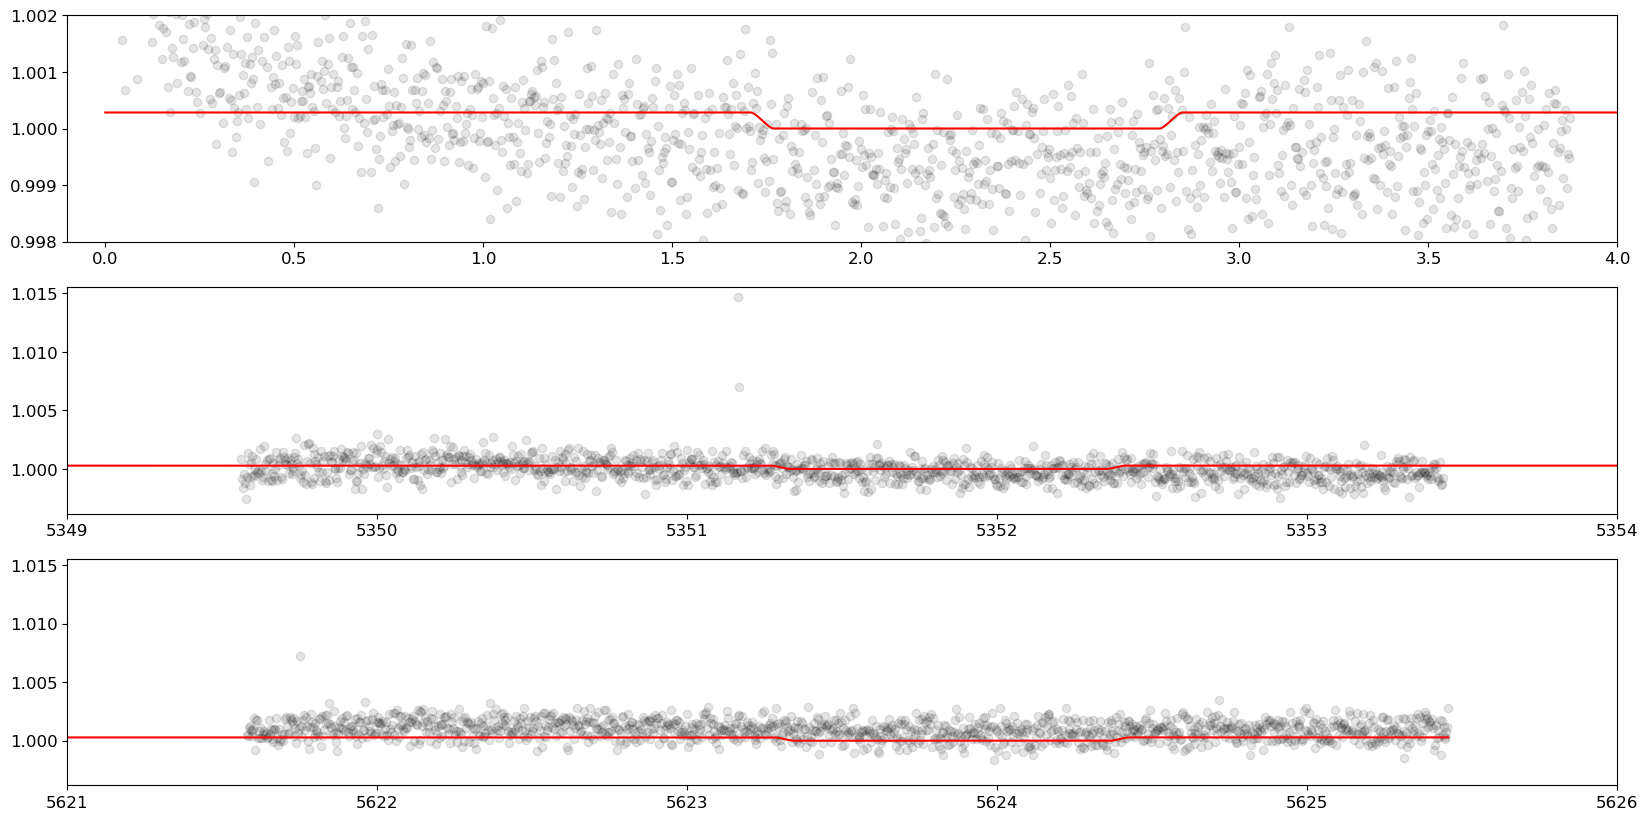

In [46]:
# plot the  eclipses with the raw flux
t_s = p0_mcmc[0]
fp = p0_mcmc[1]
flux = transit_model(time, t_s, fp)
plt.figure(figsize=(20, 2))
#plt.plot(time, aplev, 'ok', alpha=0.1)
plt.plot(time, flux, '-r')
#plt.xlim(5200, 5400)

fig, ax = plt.subplots(3, 1, figsize=(20, 10))
ax[0].plot(time, aplev, 'ok', alpha=0.1)
ax[0].plot(time, flux, '-r')
ax[0].set_xlim(-0.1, 4)
ax[0].set_ylim(0.998, 1.002)
ax[1].plot(time, aplev, 'ok', alpha=0.1)
ax[1].plot(time, flux, '-r')
ax[1].set_xlim(5349, 5354)
ax[0].set_ylim(0.998, 1.002)
ax[2].plot(time, aplev, 'ok', alpha=0.1)
ax[2].plot(time, flux, '-r')
ax[2].set_xlim(5621, 5626)
ax[0].set_ylim(0.998, 1.002)

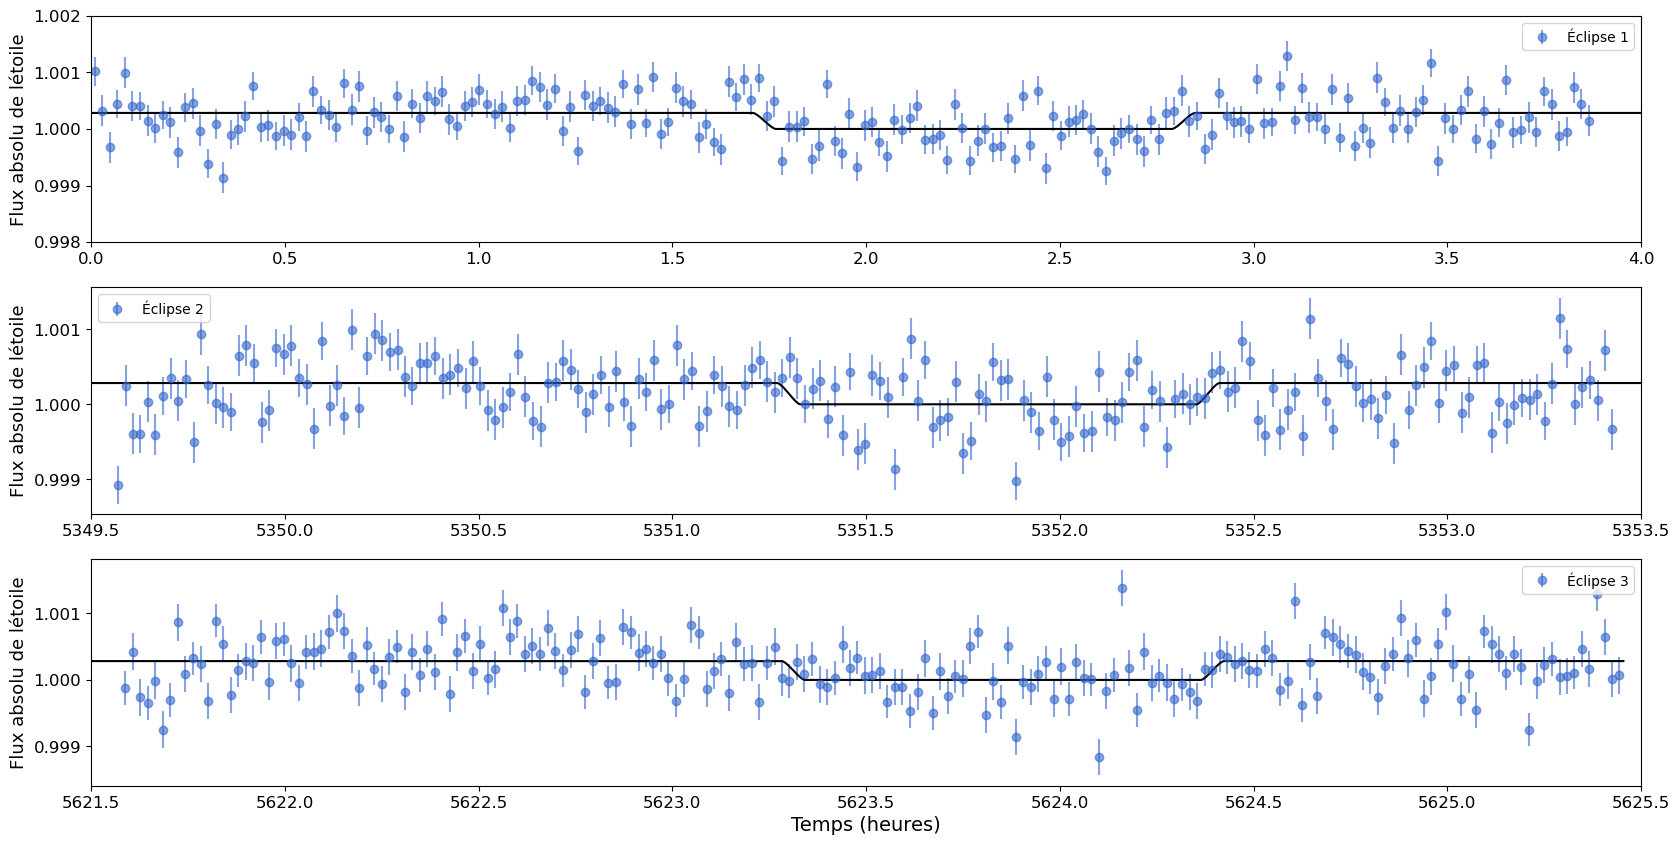

In [47]:
nbin = 200
time_segment_1 = time[:len1]
time_segment_2 = time[len1:len1+len2]
time_segment_3 = time[len1+len2:]
aplev_segment_1 = aplev[:len1]
aplev_segment_2 = aplev[len1:len1+len2]
aplev_segment_3 = aplev[len1+len2:]
aperr_segment_1 = aperr[:len1]
aperr_segment_2 = aperr[len1:len1+len2]
aperr_segment_3 = aperr[len1+len2:]

bins_time1, binErr_t = binValues(time_segment_1, time_segment_1, nbin)
bins_aplev1, binErr_aplev1 = binFluxError(aplev_segment_1, aperr_segment_1, time_segment_1, nbin)
bins_time2, binErr_t = binValues(time_segment_2, time_segment_2, nbin)
bins_aplev2, binErr_aplev2 = binFluxError(aplev_segment_2, aperr_segment_2, time_segment_2, nbin)
bins_time3, binErr_t = binValues(time_segment_3, time_segment_3, nbin)
bins_aplev3, binErr_aplev3 = binFluxError(aplev_segment_3, aperr_segment_3, time_segment_3, nbin)

fig, ax = plt.subplots(3, 1, figsize=(20, 10))
ax[0].errorbar(bins_time1, bins_aplev1/exponential_func(bins_time1, 0.0035195976487543655, 2.0649261737528786, 0.999366464321820), yerr= binErr_aplev1, linestyle='', marker='o', color='#3366cc', alpha=0.6, label='Éclipse 1')
ax[0].plot(time, flux, '-k')
ax[0].set_xlim(0, 4)
#ax[0].set_ylim(0.998, 1.002)
ax[1].errorbar(bins_time2, bins_aplev2/exponential_func(bins_time2-bins_time2[0], 0.7931758239432235, 0.00028176255386267904, 0.20706873927518615), yerr= binErr_aplev2, linestyle='', marker='o', color='#3366cc', alpha=0.6,  label='Éclipse 2')
ax[1].plot(time, flux, '-k')
ax[1].set_xlim(5349.5, 5353.5)
ax[0].set_ylim(0.998, 1.002)
ax[2].errorbar(bins_time3, bins_aplev3/exponential_func(bins_time3-bins_time3[0], 0.0637291774041382, 0.0015556758405141193, 0.9372273625802439), yerr= binErr_aplev3, linestyle='', marker='o', color='#3366cc', alpha=0.6, label='Éclipse 3')
ax[2].plot(time, flux, '-k')
ax[2].set_xlim(5621.5, 5625.5)
ax[0].set_ylim(0.998, 1.002)
ax[0].set_ylabel('Flux absolu de l''étoile', fontsize=13)
ax[1].set_ylabel('Flux absolu de l''étoile', fontsize=13)
ax[2].set_ylabel('Flux absolu de l''étoile', fontsize=13)
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[2].set_xlabel('Temps (heures)', fontsize=14)
plt.savefig('Joint_results/try3.png')   
plt.show()

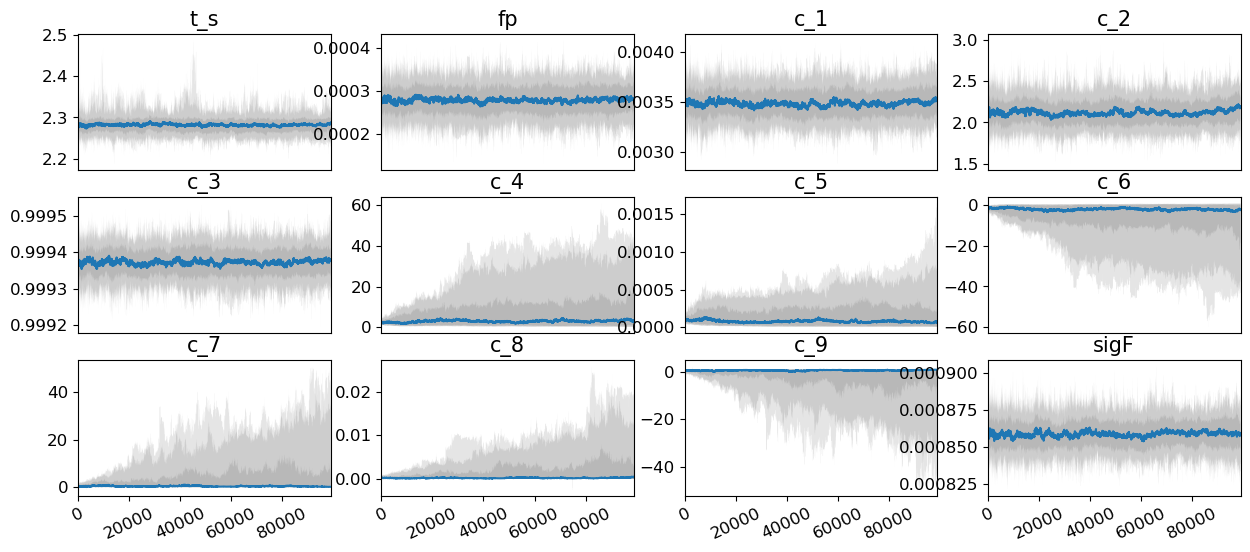

In [48]:
walk_style(chain, p0_labels, interv=10, fname='Joint_results/try4_walkers.png', showPlot=True, fontsize=15)

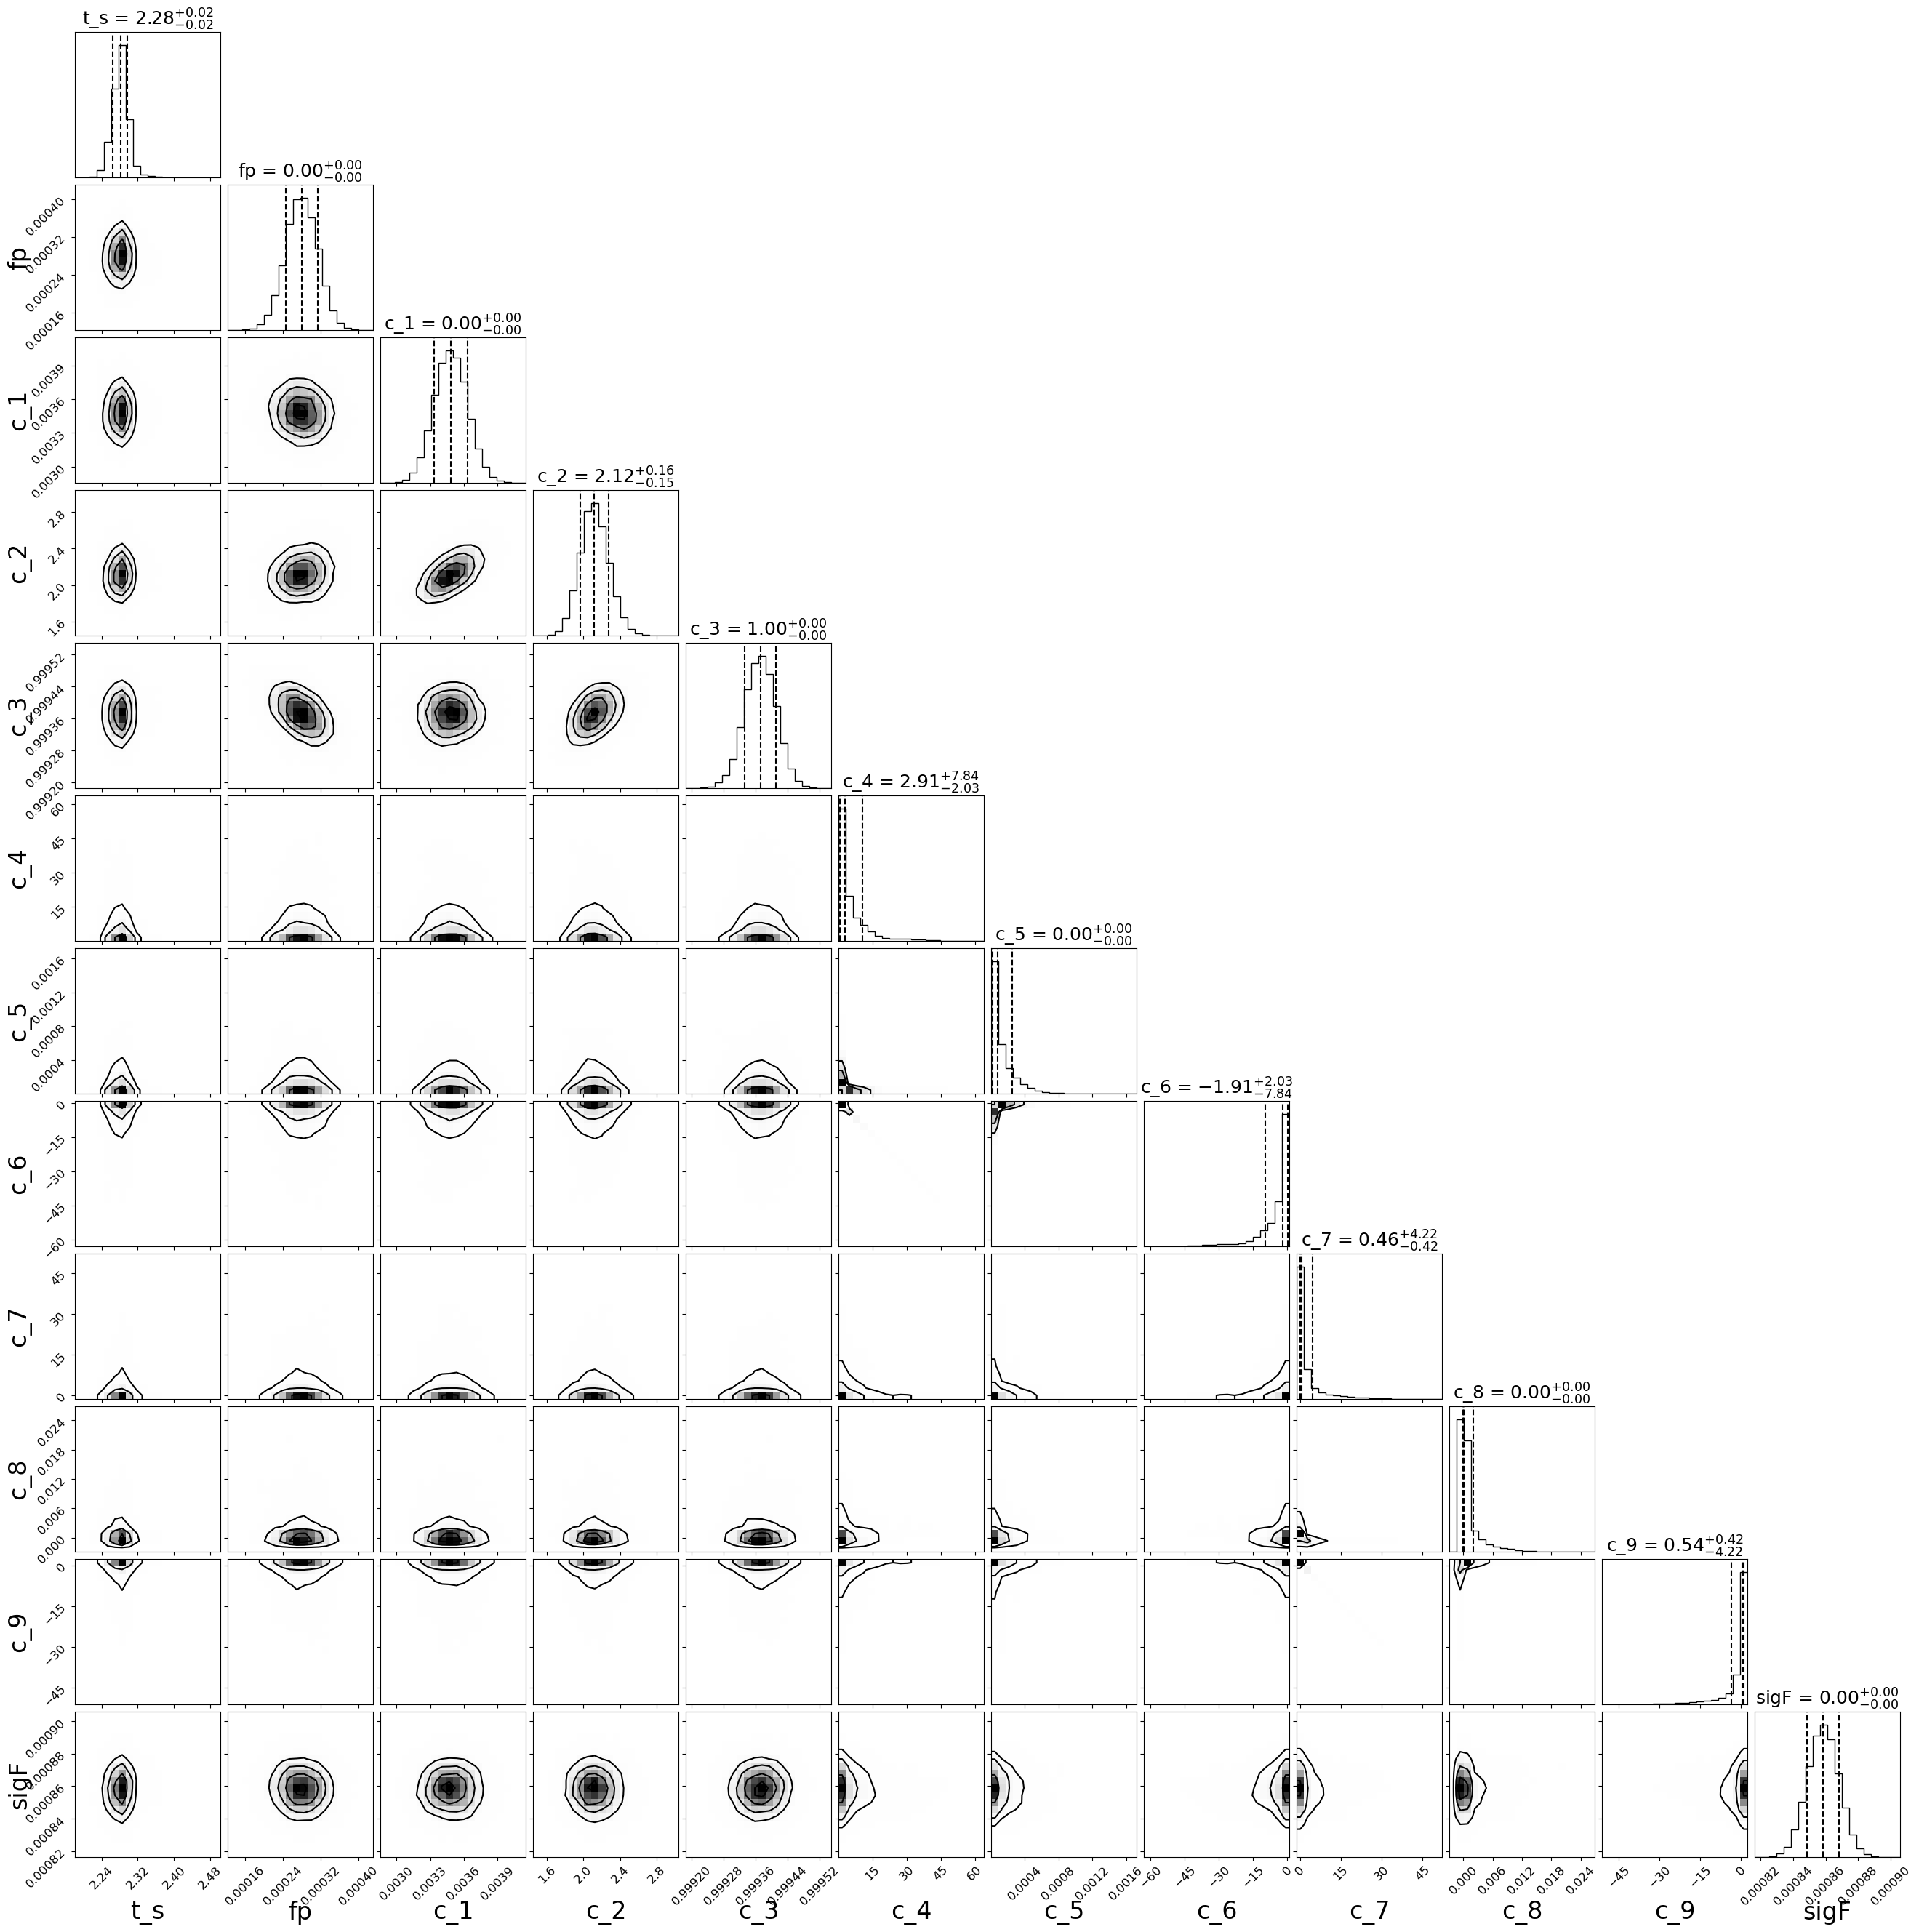

In [49]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

samples = chain.reshape((-1, ndim))
fig = corner.corner(samples, quantiles=[0.16, 0.5, 0.84], labels = p0_labels, show_titles=True,
                        plot_datapoints=False, label_kwargs={"fontsize": 24}, title_kwargs={"fontsize": 18}, quiet=False)

fig.savefig('Joint_results/try4_corners.png')
#plt.close()

In [6]:
# All the astrophysical and noise models are defined here to be used in the analysis.
# There are different options for the noise model, and they can be combined with the a second-order polynomial model for the centroids

def transit_model(time, t_s, fp):
    # this model is based on the batman package
    # fits specifically for secondary eclipses
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = t0                        #time of inferior conjunction
    params.per = 3.777940*24              #orbital period in hours
    params.rp = 0.0539                    #planet radius (in units of stellar radii) # check that this is ratio of radii -> 0.0539 is charles value
    params.a = 26.57                      #semi-major axis (in units of stellar radii)
    params.inc = 89.8                     #orbital inclination (in degrees)
    params.ecc = 0.                       #eccentricity
    params.w = 90.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.16, 0.22]               #limb darkening coefficients, values from cadieux 2024b
    params.fp = fp                        #planet to star flux ratio
    params.t_secondary = t_s

    m = batman.TransitModel(params, time, transittype="secondary")
    flux = m.light_curve(params)
    return flux

def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

def double_exponential(time, c1, c2, c3, c4):
    return c1 * np.exp(-c2 * time) + c3 * np.exp(-c4 * time)

def detec_model_poly(xdata, ydata, c1, c2, c3, c4, c5, c6):
    x, y = xdata, ydata
    pos = np.vstack((np.ones_like(x),
                     x   ,      y,
                     x**2, x   *y,      y**2))
    detec = np.array([c1, c2, c3, c4, c5, c6])
    return np.dot(detec[np.newaxis,:], pos).reshape(-1)

def signal(time, theta):
    t_s = theta[0]
    fp = theta[1]
    astro = transit_model(time, t_s, fp)

    time_segment_1 = time[:len1]
    time_segment_2 = time[len1:len1+len2]
    time_segment_3 = time[len1+len2:]
    result1 = exponential_func(time_segment_1-time_segment_1[0], *theta[2:5])
    result2 = exponential_func(time_segment_2-time_segment_2[0], *theta[5:8])
    result3 = exponential_func(time_segment_3-time_segment_3[0], *theta[8:11])
    detec = np.concatenate([result1, result2, result3])

    return astro*detec

# bin the data
def binValues(values, binAxisValues, nbin, assumeWhiteNoise=True):
    bins = np.linspace(np.nanmin(binAxisValues), np.nanmax(binAxisValues), nbin)
    digitized = np.digitize(binAxisValues, bins)
    binned = np.array([np.nanmedian(values[digitized == i]) for i in range(1, nbin)])
    binnedErr = np.nanmean(np.array([np.nanstd(values[digitized == i]) for i in range(1, nbin)]))
    if assumeWhiteNoise:
        binnedErr /= np.sqrt(len(values)/nbin)
    return binned, binnedErr

# retrieve proper errorbars on aplev
def binFluxError(values, error, binAxisValues, nbin, assumeWhiteNoise=True):
    bins = np.linspace(np.nanmin(binAxisValues), np.nanmax(binAxisValues), nbin)
    digitized = np.digitize(binAxisValues, bins)
    binned = np.array([np.nanmedian(values[digitized == i]) for i in range(1, nbin)])
    binCounts = np.array([np.sum(digitized == i) for i in range(1, nbin)])

    binnedErr = np.array([np.mean(error[digitized == i]) for i in range(1, nbin)])/np.sqrt(binCounts)

    return binned, binnedErr

# plotting functions
def walk_style(chain, labels, interv=10, fname=None, showPlot=False, fontsize=15):
    nwalk = chain.shape[0]
    ndim = chain.shape[-1]

    # get first index
    beg   = 0
    end   = len(chain[0,:,0])
    step  = np.arange(beg,end)
    step  = step[::interv]

    # number of columns and rows of subplots
    ncols = 4
    nrows = int(np.ceil(ndim/ncols))
    sizey = 2*nrows

    # plotting
    plt.figure(figsize = (15, 2*nrows))
    for ind in range(ndim):
        plt.subplot(nrows, ncols, ind+1)
        sig1 = (0.6827)/2.*100
        sig2 = (0.9545)/2.*100
        sig3 = (0.9973)/2.*100
        percentiles = [50-sig3, 50-sig2, 50-sig1, 50, 50+sig1, 50+sig2, 50+sig3]
        neg3sig, neg2sig, neg1sig, mu_param, pos1sig, pos2sig, pos3sig = np.percentile(chain[:,:,ind][:,beg:end:interv],
                                                                                       percentiles, axis=0)
        plt.plot(step, mu_param)
        plt.fill_between(step, pos3sig, neg3sig, facecolor='k', alpha = 0.1)
        plt.fill_between(step, pos2sig, neg2sig, facecolor='k', alpha = 0.1)
        plt.fill_between(step, pos1sig, neg1sig, facecolor='k', alpha = 0.1)
        plt.title(labels[ind], fontsize=fontsize)
        plt.xlim(np.min(step), np.max(step))
        if ind < (ndim - ncols):
            plt.xticks([])
        else:
            plt.xticks(rotation=25)

        y_formatter = ScalarFormatter(useOffset=False)
        plt.gca().yaxis.set_major_formatter(y_formatter)
        plt.gca().xaxis.set_tick_params(labelsize=fontsize*0.8)
        plt.gca().yaxis.set_tick_params(labelsize=fontsize*0.8)

    if fname != None:
        plt.savefig(fname, bbox_inches='tight')

    if showPlot:
        plt.show()

    #plt.close()
    return

In [7]:
# MCMC functions
def log_likelihood(theta, time, flux):
    model = signal(time, theta)
    sigF = theta[-1]
    sigma2 = sigF**2
    return -0.5 * np.sum((flux - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    prior = 0.
    t_s = theta[0]
    fp = theta[1]
    sigF = theta[-1]
    
    if (0 < fp < 1 and sigF > 0. ): # (eclipse-(e_dur_days/2)) < t_s < (eclipse+(e_dur_days/2)) and 
        return 0.0 + prior
    return np.inf

def log_prob(theta, time, flux):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, time, flux)